# Spectral Clustering
---
* Divide the data points into several groups such that points in the same group are similar and points in different groups are dissimilar to each other.
* Simple implementation and promising performance in many graph-based clustering. 
* It can be solved efficiently by standard linear algebra software, and very often outperforms traditional algorithms such as the k-means algorithm.
* The main tools for spectral clustering are graph Laplacian matrices.


    ![1_GD0E2nvpj853wOz5WTB35Q.jpeg](Spectral Clustering/img/1_GD0E2nvpj853wOz5WTB35Q.jpeg)

In [ ]:
def spectral(self, X, n_clusters = n_clusters):
       sp = cluster.SpectralClustering(n_clusters)
       return sp.fit_predict(X)

![untitled.png](Spectral Clustering/img/untitled.png)
![vvv.png](Spectral Clustering/img/vvv.png)

### In image processing: 

Knowing as segmentation-based object categorization

![1_R1irn9cmnbEOY7MVlQ6ojg.png](Spectral Clustering/img/1_R1irn9cmnbEOY7MVlQ6ojg.png)

                        Original image (left) and segmented image using spectral clustering (right)
                        
![sphx_glr_plot_face_segmentation_0021.png](Spectral Clustering/img/sphx_glr_plot_face_segmentation_0021.png)
                        

In [ ]:
import numpy as np
from sklearn.cluster import SpectralClustering

Yss = []
gammas = np.linspace(0, 12, 4)
for gamma in gammas:
    sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=2)
    Yss.append(sc.fit_predict(X))

![123.png](Spectral Clustering/img/123.png)

---
* The goal of spectral clustering is to cluster data that is connected but not lnecessarily compact or clustered within convex boundaries.
* As for many other kernel-based methods, spectral clustering needs a previous analysis to detect which kernel can provide the best values for the affinity matrix.
* Scikit-learn also allows us to define custom kernels for those tasks that cannot easily be solved using the standard ones.

![download.gif](Spectral Clustering/img/download.gif)

In [16]:
%matplotlib inline

Return a sample from the “standard normal” distribution.


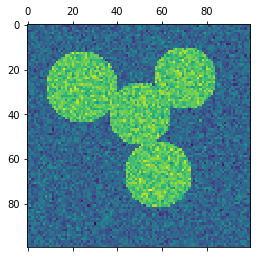

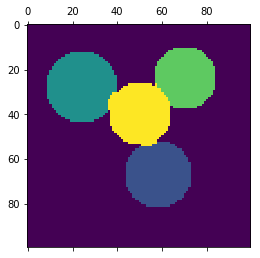

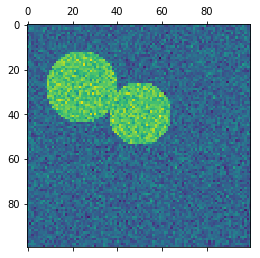

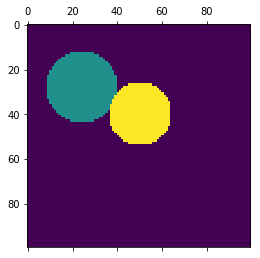

In [19]:
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

'''One way to define this matrix, np.indices returns arrays which can be used as indices.
                            The elements in l indicate the row index, and the column index'''

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.

mask = img.astype(bool) # Astype = Casting

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

'''Arpack, able to find eigenvalues and eigenvectors 
of any linear function mapping a vector to a vector.'''

plt.matshow(img)
plt.matshow(label_im)

'''Display an array as a matrix in a new figure window.'''

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)
'''Return a sample from the “standard normal” distribution.'''

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

---
Tutorial
* https://calculatedcontent.com/2012/10/09/spectral-clustering/
* http://scalefreegan.github.io/Teaching/DataIntegration/practicals/p2.html
* https://www.youtube.com/watch?v=GsK5SuAirUI&t=10s
* http://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py
---
